The aim of this assignment is to understand the churn rate of the telecom customers based on their usage. The churn value is binary where True indicates that that the company eventually lost this customer, and False indicates that the customer was retained.
We try to identify the customers that stayed with the company and contrast them against those that left, we want to analyze the data to understand why some customers stayed while others left. We will use different numpy and pandas functions as well as visual plots in order to help us undersatnd and analyse this dataset. We can eventually use these insights in order to make suggestions on how we can reduce the churn rate and retain customers. However, for the purposes of this project we will limit our conclusions to the analysis. 


In [109]:
# we first start with importing the numpy, pandas and plotting libraries
import numpy as np
import pandas as pd
# from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

In [110]:
# we then read the provided telecom_churn file in a raw format
file = r'~/Documents/SDBI/Python/telecom_churn.csv'

In [111]:
# add the data from it into our pandas dataframe
telecom = pd.read_csv(file)

In [79]:
# we use this to get a brief idea of what the data is
telecom.head(10)

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False
5,AL,118,510,391-8027,yes,no,0,223.4,98,37.98,...,101,18.75,203.9,118,9.18,6.3,6,1.70,0,False
6,MA,121,510,355-9993,no,yes,24,218.2,88,37.09,...,108,29.62,212.6,118,9.57,7.5,7,2.03,3,False
7,MO,147,415,329-9001,yes,no,0,157.0,79,26.69,...,94,8.76,211.8,96,9.53,7.1,6,1.92,0,False
8,LA,117,408,335-4719,no,no,0,184.5,97,31.37,...,80,29.89,215.8,90,9.71,8.7,4,2.35,1,False
9,WV,141,415,330-8173,yes,yes,37,258.6,84,43.96,...,111,18.87,326.4,97,14.69,11.2,5,3.02,0,False


In [5]:
# getting information about the contents of the file at a glance
telecom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

On executing the previous cell, a preliminary view shows us that the data is already pretty clean and organised and that there are no null values. 

In [6]:
# lets look at some numbers now
telecom.describe()

,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


In [7]:
# lets look at the no of unique values per column
telecom.nunique()

state                       51
account length             212
area code                    3
phone number              3333
international plan           2
voice mail plan              2
number vmail messages       46
total day minutes         1667
total day calls            119
total day charge          1667
total eve minutes         1611
total eve calls            123
total eve charge          1440
total night minutes       1591
total night calls          120
total night charge         933
total intl minutes         162
total intl calls            21
total intl charge          162
customer service calls      10
churn                        2
dtype: int64

We can see from executing the above cell that the columns international plan and voicemail plan have only two unique values, yes or no, which can also be interpreted as as true or false. We also know that the data type of these columns is object, therefore we can replace these values with 1 & 0 in order to make working with the data easier. We know that the churn column already has true or false values which we will also change to 1 & 0. 

In [80]:
# modifying the international plan and voicemail plan columns 

telecom['international plan'] = np.where(telecom['international plan']== "yes", 1, 0)

telecom['voice mail plan'] = np.where(telecom['voice mail plan']== "yes", 1, 0)

telecom['churn'] = np.where(telecom['churn']== True, 1, 0)



In [ ]:
telecom.plot()
plt.show()

In [81]:
# lets look at the churn data - which is our target variable

telecom["churn"].value_counts()

0    2850
1     483
Name: churn, dtype: int64

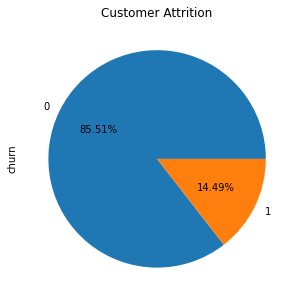

In [82]:
# let us visualise this
plt.figure(figsize=[5,5])
plt.title('Customer Attrition')
telecom['churn'].value_counts().plot.pie(autopct='%1.2f%%')
plt.show()

As we see from the above churn numbers, while there is a large share of the customers that the company has retained, it has lost nearly 15% of its customers. We will try to identify if there are patterns in the dataset which can help us understand why. 

In [83]:
# lets look at the statewise churn data
pd.crosstab(telecom["state"], telecom["churn"])

churn,0,1
state,,
AK,49,3
AL,72,8
AR,44,11
AZ,60,4
CA,25,9
CO,57,9
CT,62,12
DC,49,5
DE,52,9


The statewise churn does not give us any real concrete insight, there isnt sufficient data to make a calculated observation. Therefore, we will try something different, we can add a few columns for cost per call to see if there is a difference in the cost per call for customers based on certain segments. Perhaps the cost per call is variable.

In [115]:

telecom["day charge"] = telecom["total day charge"]/telecom["total day minutes"]

telecom["eve charge"] = telecom["total eve charge"]/telecom["total eve minutes"]

telecom["night charge"] = telecom["total night charge"]/telecom["total night minutes"]

telecom["intl charge"] = telecom["total intl charge"]/telecom["total intl minutes"]

In [86]:
# lets view the newly added columns for customers that left
telecom[['churn', 'day charge', 'eve charge', 'night charge', 'intl charge']].loc[telecom["churn"]==1].head(30)


,churn,day charge,eve charge,night charge,intl charge
10,1,0.170023,0.084989,0.045019,0.270079
15,1,0.169991,0.084991,0.045019,0.270370
21,1,0.170032,0.084991,0.044990,0.270175
33,1,0.169992,0.084984,0.045004,0.270339
41,1,0.170017,0.084993,0.045008,0.269863
48,1,0.170019,0.084998,0.044972,0.270455
54,1,0.170000,0.084980,0.045022,0.270103
57,1,0.170010,0.084993,0.044978,0.270690
69,1,0.169983,0.084979,0.045020,0.270290
76,1,0.169997,0.085028,0.044983,0.270085


In [87]:
# lets view the newly added columns for customers that havent left
telecom[['churn', 'day charge', 'eve charge', 'night charge', 'intl charge']].loc[telecom["churn"]==0].head(30)


,churn,day charge,eve charge,night charge,intl charge
0,0,0.170011,0.085005,0.044994,0.270000
1,0,0.169988,0.085013,0.045008,0.270073
2,0,0.170008,0.084983,0.045018,0.269672
3,0,0.170007,0.084976,0.044997,0.269697
4,0,0.170006,0.085030,0.044997,0.270297
5,0,0.170009,0.084995,0.045022,0.269841
6,0,0.169982,0.084993,0.045014,0.270667
7,0,0.170000,0.084966,0.044995,0.270423
8,0,0.170027,0.085011,0.044995,0.270115
9,0,0.169992,0.085000,0.045006,0.269643


The cost per call appears to be in a similar for all customers, this line of thought didnt get us very far so we can drop the columns we added above. We will now try plotting a correlation matrix, it will help us narrow down the data we should focus on. We will only focus on the correlation of the numeric values.

In [116]:
# dropping the newly added columns
telecom.drop(columns=['day charge', 'eve charge', 'night charge', 'intl charge'], axis=1, inplace=True)


Let us look if the no of minutes spent calling during the different times of day has any relevance.

In [123]:
# customers who stayed
telecom[['churn', 'total day minutes', 'total eve minutes', 'total night minutes', 'total intl minutes']].loc[telecom["churn"]==0].describe()


,total day minutes,total eve minutes,total night minutes,total intl minutes
count,2850.000000,2850.000000,2850.000000,2850.000000
mean,175.175754,199.043298,200.133193,10.158877
std,50.181655,50.292175,51.105032,2.784489
min,0.000000,0.000000,23.200000,0.000000
25%,142.825000,164.500000,165.900000,8.400000
50%,177.200000,199.600000,200.250000,10.200000
75%,210.300000,233.200000,234.900000,12.000000
max,315.600000,361.800000,395.000000,18.900000


In [122]:
# customers who left
telecom[['churn', 'total day minutes', 'total eve minutes', 'total night minutes', 'total intl minutes']].loc[telecom["churn"]==1].describe()


,total day minutes,total eve minutes,total night minutes,total intl minutes
count,483.000000,483.000000,483.000000,483.00000
mean,206.914079,212.410145,205.231677,10.70000
std,68.997792,51.728910,47.132825,2.79319
min,0.000000,70.900000,47.400000,2.00000
25%,153.250000,177.100000,171.250000,8.80000
50%,217.600000,211.300000,204.800000,10.60000
75%,265.950000,249.450000,239.850000,12.80000
max,350.800000,363.700000,354.900000,20.00000


From the above it appears that customers who left spent more time on day calls and marginally higher times on evening and night calls as compared to customers who stayed. 

In [89]:
# correlation matrix of numeric colums
corr = telecom[["account length", "number vmail messages", "total day minutes", "total day calls", "total day charge", "total eve minutes", "total eve calls", "total eve charge", "total night minutes", "total night calls", "total night charge", "total intl minutes", "total intl calls", "total intl charge", "customer service calls"]].corr()
corr.style.background_gradient(cmap='coolwarm')

,account length,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
account length,1.000000,-0.004628,0.006216,0.038470,0.006214,-0.006757,0.019260,-0.006745,-0.008955,-0.013176,-0.008960,0.009514,0.020661,0.009546,-0.003796
number vmail messages,-0.004628,1.000000,0.000778,-0.009548,0.000776,0.017562,-0.005864,0.017578,0.007681,0.007123,0.007663,0.002856,0.013957,0.002884,-0.013263
total day minutes,0.006216,0.000778,1.000000,0.006750,1.000000,0.007043,0.015769,0.007029,0.004323,0.022972,0.004300,-0.010155,0.008033,-0.010092,-0.013423
total day calls,0.038470,-0.009548,0.006750,1.000000,0.006753,-0.021451,0.006462,-0.021449,0.022938,-0.019557,0.022927,0.021565,0.004574,0.021666,-0.018942
total day charge,0.006214,0.000776,1.000000,0.006753,1.000000,0.007050,0.015769,0.007036,0.004324,0.022972,0.004301,-0.010157,0.008032,-0.010094,-0.013427
total eve minutes,-0.006757,0.017562,0.007043,-0.021451,0.007050,1.000000,-0.011430,1.000000,-0.012584,0.007586,-0.012593,-0.011035,0.002541,-0.011067,-0.012985
total eve calls,0.019260,-0.005864,0.015769,0.006462,0.015769,-0.011430,1.000000,-0.011423,-0.002093,0.007710,-0.002056,0.008703,0.017434,0.008674,0.002423
total eve charge,-0.006745,0.017578,0.007029,-0.021449,0.007036,1.000000,-0.011423,1.000000,-0.012592,0.007596,-0.012601,-0.011043,0.002541,-0.011074,-0.012987
total night minutes,-0.008955,0.007681,0.004323,0.022938,0.004324,-0.012584,-0.002093,-0.012592,1.000000,0.011204,0.999999,-0.015207,-0.012353,-0.015180,-0.009288
total night calls,-0.013176,0.007123,0.022972,-0.019557,0.022972,0.007586,0.007710,0.007596,0.011204,1.000000,0.011188,-0.013605,0.000305,-0.013630,-0.012802


As we can see from the above plot, there are several columns that are highly correlated, we can go ahead and drop those. the charge is directly proportional to minutes therefore we dont really need the duplicate columns for the purposes of our analysis. 

In [90]:
# dropping unnecessary columns

telecom.drop(columns=["total day minutes", "total eve minutes", "total night minutes", "total intl minutes"], axis=1, inplace=True)


In [91]:
# correlation matrix of numeric colums after dropping some columns
corr = telecom[["account length", "number vmail messages", "total day calls", "total day charge", "total eve calls", "total eve charge", "total night calls", "total night charge", "total intl calls", "total intl charge", "customer service calls"]].corr()
corr.style.background_gradient(cmap='coolwarm')


,account length,number vmail messages,total day calls,total day charge,total eve calls,total eve charge,total night calls,total night charge,total intl calls,total intl charge,customer service calls
account length,1.000000,-0.004628,0.038470,0.006214,0.019260,-0.006745,-0.013176,-0.008960,0.020661,0.009546,-0.003796
number vmail messages,-0.004628,1.000000,-0.009548,0.000776,-0.005864,0.017578,0.007123,0.007663,0.013957,0.002884,-0.013263
total day calls,0.038470,-0.009548,1.000000,0.006753,0.006462,-0.021449,-0.019557,0.022927,0.004574,0.021666,-0.018942
total day charge,0.006214,0.000776,0.006753,1.000000,0.015769,0.007036,0.022972,0.004301,0.008032,-0.010094,-0.013427
total eve calls,0.019260,-0.005864,0.006462,0.015769,1.000000,-0.011423,0.007710,-0.002056,0.017434,0.008674,0.002423
total eve charge,-0.006745,0.017578,-0.021449,0.007036,-0.011423,1.000000,0.007596,-0.012601,0.002541,-0.011074,-0.012987
total night calls,-0.013176,0.007123,-0.019557,0.022972,0.007710,0.007596,1.000000,0.011188,0.000305,-0.013630,-0.012802
total night charge,-0.008960,0.007663,0.022927,0.004301,-0.002056,-0.012601,0.011188,1.000000,-0.012329,-0.015186,-0.009277
total intl calls,0.020661,0.013957,0.004574,0.008032,0.017434,0.002541,0.000305,-0.012329,1.000000,0.032372,-0.017561
total intl charge,0.009546,0.002884,0.021666,-0.010094,0.008674,-0.011074,-0.013630,-0.015186,0.032372,1.000000,-0.009675


In [92]:
# lets look at the churn data for international plan users
pd.crosstab(telecom["international plan"], telecom["churn"])


churn,0,1
international plan,,
0,2664,346
1,186,137


In [93]:
# lets look at the churn data for voicemail plan users
pd.crosstab(telecom["voice mail plan"], telecom["churn"])


churn,0,1
voice mail plan,,
0,2008,403
1,842,80


We can see from the above numbers that a higher proportion of users who have an international plan have left that those who dont, however that is still not conclusive. We also see that the same observation is not true for the users who have voicemail plans.

In [94]:
# lets also look at the churn data for the length of the account 
pd.crosstab(telecom["account length"], telecom["churn"]).head(30)

churn,0,1
account length,,
1,7,1
2,0,1
3,5,0
4,1,0
5,1,0
6,2,0
7,2,0
8,1,0
9,3,0


In [95]:
# lets also look at the churn data for the length of the account 
pd.crosstab(telecom["account length"], telecom["churn"]).tail(30)

churn,0,1
account length,,
184,3,1
185,6,0
186,2,0
188,0,1
189,6,0
190,7,0
191,1,0
192,3,0
193,3,1


In [96]:
# lets also look at the description of the churn data for the length of the account
pd.crosstab(telecom["account length"], telecom["churn"]).describe()

churn,0,1
count,212.000000,212.000000
mean,13.443396,2.278302
std,10.135181,2.164536
min,0.000000,0.000000
25%,4.000000,1.000000
50%,12.000000,2.000000
75%,22.000000,4.000000
max,39.000000,9.000000


There is no apparent pattern here.

In [97]:
# lets see if the customer service calls gives us any insight
telecom['customer service calls'].describe()

count    3333.000000
mean        1.562856
std         1.315491
min         0.000000
25%         1.000000
50%         1.000000
75%         2.000000
max         9.000000
Name: customer service calls, dtype: float64

In [98]:
# finally lets look at the churn data for customer service calls
pd.crosstab(telecom["customer service calls"], telecom["churn"])

churn,0,1
customer service calls,,
0,605,92
1,1059,122
2,672,87
3,385,44
4,90,76
5,26,40
6,8,14
7,4,5
8,1,1


There is no direct relation of customer loss to the number of customer service calls. There are several customers who have made high number of calls and still chose to stay with the provider, while there are several persons who have left after just one call. Therefore, we cannot make any assumptions about this.

In [99]:
# lets look at the general information of customers who didnt leave
telecom.loc[telecom["churn"]==0]

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day calls,total day charge,total eve calls,total eve charge,total night calls,total night charge,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,0,1,25,110,45.07,99,16.78,91,11.01,3,2.70,1,0
1,OH,107,415,371-7191,0,1,26,123,27.47,103,16.62,103,11.45,3,3.70,1,0
2,NJ,137,415,358-1921,0,0,0,114,41.38,110,10.30,104,7.32,5,3.29,0,0
3,OH,84,408,375-9999,1,0,0,71,50.90,88,5.26,89,8.86,7,1.78,2,0
4,OK,75,415,330-6626,1,0,0,113,28.34,122,12.61,121,8.41,3,2.73,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,AZ,192,415,414-4276,0,1,36,77,26.55,126,18.32,83,12.56,6,2.67,2,0
3329,WV,68,415,370-3271,0,0,0,57,39.29,55,13.04,123,8.61,4,2.59,3,0
3330,RI,28,510,328-8230,0,0,0,109,30.74,58,24.55,91,8.64,6,3.81,2,0
3331,CT,184,510,364-6381,1,0,0,105,36.35,84,13.57,137,6.26,10,1.35,2,0


In [100]:
# lets look at the general information of customers who did leave
telecom.loc[telecom["churn"]==1]

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day calls,total day charge,total eve calls,total eve charge,total night calls,total night charge,total intl calls,total intl charge,customer service calls,churn
10,IN,65,415,329-6603,0,0,0,137,21.95,83,19.42,111,9.40,6,3.43,4,1
15,NY,161,415,351-7269,0,0,0,67,56.59,97,27.01,128,7.23,9,1.46,4,1
21,CO,77,408,393-7984,0,0,0,89,10.61,121,14.44,64,9.43,6,1.54,5,1
33,AZ,12,408,360-1596,0,0,0,118,42.43,119,21.45,90,12.61,3,3.19,1,1
41,MD,135,408,383-6029,1,1,41,85,29.43,107,17.33,78,5.50,15,3.94,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3301,CA,84,415,417-1488,0,0,0,113,47.60,90,17.19,103,7.06,4,2.81,0,1
3304,IL,71,510,330-7137,1,0,0,114,31.64,140,16.88,80,9.29,5,3.73,4,1
3320,GA,122,510,411-5677,1,0,0,101,23.80,77,16.69,133,5.40,4,2.62,4,1
3322,MD,62,408,409-1856,0,0,0,105,54.59,122,22.57,72,8.12,2,3.11,4,1


A preliminary view shows us that the data is already pretty clean and organised and that there are no null values. 

A description of the dataframe showed us that the columns international plan and voicemail plan have only two unique values, yes or no, which can also be interpreted as true or false. I also know that the data type of these columns is object, therefore I replaced these values with 1 & 0 in order to make working with the data easier. I know that the churn column already has true or false values which I changed to 1 & 0.  

The churn numbers on the other hand  showed us that while there is a large share of the customers that the company has retained, it has lost nearly 15% of its customers. Therefore, I tried to identify if there are patterns in the dataset which can help us understand why.

The state wise churn did not give us any real concrete insight, and there wasn’t sufficient data to make a calculated observation. Therefore, I tried to add a few columns for cost per call to see if there was a difference in the cost per call for customers based on certain segments. Perhaps the cost per call was variable. However, that was not the case. The cost per call was in a similar range for all customers, this line of thought didn’t get me very far so I dropped the new columns. 

I then tried to see if there was any co-relation between the amount of time the customers spent on calls during different times of the day to the churn numbers.  From the description of the dataset between the customers who stayed and left  it appeared that customers who left spent more time on day calls and marginally higher times on evening and night calls as compared to customers who stayed. However, this could not be a decisive analysis, since the numbers weren’t highly unusual.

I then plotted a correlation matrix, it was to help us narrow down the data we should focus on and get rid of any redundant values. I only focused on the correlation of the numeric values. As seen from the plot, there are several columns that are highly correlated. I went ahead and dropped those. The charge columns are directly proportional to the minute columns, therefore we don’t really need the duplicate columns for the purposes of our analysis.

I then looked at the churn data for customers based on whether they had activated international plans or voicemail plans. I observed that a higher proportion of users who have an international plan have left that those who don’t, however that is still not conclusive. I also see that the same observation is not true for the users who have voicemail plans.

Further, there is no direct relation of customer loss to the number of customer service calls. To start with I do not do not know the reasoning for the calls so I look at the data keeping that aside. There are several customers who have made high number of customer service calls and still chose to stay with the provider, while there are several persons who have left after just one call. Therefore, we cannot make any assumptions about this. 

In conclusion, there is no apparent pattern that can give us a proper reasoning as to why the company has lost nearly 15% of its customers, perhaps using machine learning models to simulate a larger volume of data will give us better insight. However, despite the above observations and some irregularities, the existing dataset is too small to give us any conclusive analysis.
